<a href="https://colab.research.google.com/github/afauzan14/Case-Study02-DataMining/blob/main/Kelompok_C_Study_Case_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok C Study Case 2**
| Nama | NIM | Kelas |
| -------- | -------- | -------- |
| Rio Tri Wibowo | 11220940000004   | DS 2   |
| Alif Alamsyah  | 11220940000028   | DS 2   |
| Ahmad Fauzan   | 11220940000031   | DS 2   |
| Aisya Shalifa  | 11220940000032   | DS 1   |
| Ibnullabib     | 11220940000037   | D2 2   |


# **Pendahuluan**

**MixITup** adalah perusahaan yang bergerak di bidang Ice Cream, Boba Drinks, dan Desserts (snacks). Saat ini, MixITup telah memiliki tiga cabang di Jakarta, Depok, dan Tangerang. Perusahaan berencana memperluas bisnisnya ke kota lain dan menjalankan kampanye pemasaran besar-besaran.  

Melalui data pelanggan yang telah terkumpul, akan dilakukan proses *Data Mining* untuk mendapatkan insight serta saran atau strategi yang dapat diimplementasikan. Salah satu metode yang dapat diterapkan adalah segmentasi pelanggan, yaitu mengelompokkan pelanggan berdasarkan karakteristik serupa. Teknik ini bertujuan untuk memahami perilaku pelanggan dan menyusun strategi bisnis yang tepat.  

Untuk segmentasi ini, akan digunakan *unsupervised machine learning*. Salah satu algoritma yang cocok adalah *K-Prototypes*, yaitu kombinasi dari K-Means dan K-Modes. Algoritma ini memungkinkan segmentasi dengan menggunakan data yang bersifat numerik dan kategorik secara bersamaan.

# Install dan Import Library

In [1]:
!pip install matplotlib seaborn
!pip install kmodes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes



# Load Data

In [2]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/afauzan14/Case-Study02-DataMining/main/Case-Study-02-MixITup.csv

--2024-10-18 07:51:36--  https://raw.githubusercontent.com/afauzan14/Case-Study02-DataMining/main/Case-Study-02-MixITup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [text/plain]
Saving to: ‘data/Case-Study-02-MixITup.csv’

Case-Study-02-MixIT 100%[===================>]   9.81K  --.-KB/s    in 0s      

2024-10-18 07:51:36 (49.8 MB/s) - ‘data/Case-Study-02-MixITup.csv’ saved [10044/10044]



In [3]:
df = pd.read_csv("data/Case-Study-02-MixITup.csv", sep=';')
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,Rp13.114.754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,Rp33.606.557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,Rp15.983.606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,Rp12.704.918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,Rp20.081.967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,Rp4.098.360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,Rp15.983.606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,Rp43.032.786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,Rp1.229.508,94,1,Depok,0.0,Selasa,0


## Memeriksa ukuran dan tipe data

In [4]:
df.shape

(200, 10)

Data terdiri dari 200 baris dan 10 kolom.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    object 
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.8+ KB


Informasi yang didapat yaitu data ini memiliki 200 baris dan 10 kolom yang memuat tipe data int64, object, dan float64.

In [6]:
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,Rp13.114.754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,Rp33.606.557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,Rp15.983.606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,Rp12.704.918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,Rp20.081.967,42,1,Jakarta,2.0,Senin,8


In [7]:
df.describe()

,ID,skor-pengeluaran,Promo,FavFlavor
count,200.000000,200.00000,194.000000,200.000000
mean,200.500000,50.47000,1.685567,3.605000
std,57.879185,26.07101,0.970603,2.743466
min,101.000000,1.00000,0.000000,0.000000
25%,150.750000,34.75000,1.000000,1.000000
50%,200.500000,50.00000,1.000000,3.500000
75%,250.250000,73.00000,3.000000,6.000000
max,300.000000,101.00000,5.000000,9.000000


## Memeriksa duplikat data

In [8]:
df.duplicated().sum()

0

Tidak terdapat duplikat data

## Memeriksa missing value

In [9]:
df.isnull().sum()

,0
ID,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,12
Kota,0
Promo,6
HariFav,0
FavFlavor,0


Dapat dilihat bahwa terdapat beberapa missing value pada 3 kolom, yaitu kolom Jenis Kelamin, Menikah, Promo. Untuk itu perlu dilakukan analisis untuk mengatasi missing value agar mendapatkan hasil analisis yang lebih akurat.

# Preprocessing Data

##Outlier dan noise dataset

Akan diperiksa outlier dan noise pada masing-masing variabel. Hal ini dilakukan untuk memastikan kualitas dan akurasi hasil analisis.

### Variabel Jenis Kelamin

In [10]:
df['Jenis Kelamin'].unique()

array(['Wanita', 'Pria', nan, '-'], dtype=object)

In [11]:
df[df['Jenis Kelamin'].isnull()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
19,120,NaN,49,Rp9.836.065,28,1,Tangerang,3.0,Sabtu,7
47,148,NaN,36,Rp29.508.196,10,1,Tangerang,3.0,Minggu,6
117,218,NaN,49,Rp15.983.606,42,1,Jakarta,2.0,Minggu,2
135,236,NaN,49,Rp19.262.295,48,1,Jakarta,2.0,Minggu,2


Terdapat noise '-' pada variabel Jenis Kelamin, dan juga terdapat missing value.

In [12]:
df[df['Jenis Kelamin'] == '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
185,286,-,21,Rp0,81,0,Depok,1.0,Jumat,0


Penanganannya adalah dengan menghapus "-", karena nilai dari variabel yang lain tidak logis.

In [13]:
# untuk yang "-" dihapus, karena nilai dari variabel yang lain tidak logis
df = df[df['ID'] != 286]

print("\nData Setelah Menghapus Baris dengan elemen '-': ")
print(df)


Data Setelah Menghapus Baris dengan elemen '-': 
      ID Jenis Kelamin Umur Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0    101        Wanita   49         Rp13.114.754                52       1   
1    102        Wanita   32         Rp33.606.557                86       1   
2    103          Pria   51         Rp15.983.606                41       1   
3    104          Pria   19         Rp12.704.918                55       0   
4    105        Wanita   38         Rp20.081.967                42       1   
..   ...           ...  ...                  ...               ...     ...   
195  296          Pria   31          Rp4.098.360                73       1   
196  297          Pria   57         Rp15.983.606                51       1   
197  298        Wanita   35         Rp43.032.786                79       1   
198  299        Wanita   23          Rp1.229.508                94       1   
199  300          Pria   50          Rp1.639.344                14       1   

          Kot

In [14]:
# cek lagi setelah menangani
df[df['Jenis Kelamin'] == '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


Noise sudah ditangani untuk variabel 'Jenis Kelamin'

### Variabel Umur

In [15]:
df['Umur'].unique()

array(['49', '32', '51', '19', '38', '33', '27', '24', '21', '31', '36',
       '46', '60', '58', '47', '45', '22', '18', '59', '44', '39', '35',
       '20', '30', '23', '48', '37', '40', '34', '41', '53', '54', '28',
       '55', '25', '50', '42', '29', '43', '52', '2', "35'", '56', '26',
       '57'], dtype=object)

In [16]:
df[df['Umur'] == '2']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,220,Pria,2,Rp18.032.786,41,0,Jakarta,2.0,Senin,0


Terdapat pelanggan dengan umur 2 tahun.

In [17]:
df[df['Umur'] == "35'"]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
134,235,Wanita,35',Rp2.459.016,35,NaN,Tangerang,3.0,Senin,5


Terdapat pelanggan dengan umur 35' (noise).

In [18]:
#untuk yang "2", karena nilai dari variabel yang lain tidak logis
df = df[df['ID'] != 220]
print("\nData Setelah Menghapus Baris dengan umur 2:")
print(df)


Data Setelah Menghapus Baris dengan umur 2:
      ID Jenis Kelamin Umur Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0    101        Wanita   49         Rp13.114.754                52       1   
1    102        Wanita   32         Rp33.606.557                86       1   
2    103          Pria   51         Rp15.983.606                41       1   
3    104          Pria   19         Rp12.704.918                55       0   
4    105        Wanita   38         Rp20.081.967                42       1   
..   ...           ...  ...                  ...               ...     ...   
195  296          Pria   31          Rp4.098.360                73       1   
196  297          Pria   57         Rp15.983.606                51       1   
197  298        Wanita   35         Rp43.032.786                79       1   
198  299        Wanita   23          Rp1.229.508                94       1   
199  300          Pria   50          Rp1.639.344                14       1   

          Kota  Pr

In [19]:
df[df['Umur'] == "2"]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


Pelanggan dengan umur 2 tahun sudah dibuang dari data.

In [20]:
# cek noise
df[df['Umur'] == "35'"]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
134,235,Wanita,35',Rp2.459.016,35,NaN,Tangerang,3.0,Senin,5


In [21]:
# Menghapus tanda kutip (atau karakter lainnya yang tidak valid) dari kolom yang bermasalah
df['Umur'] = df['Umur'].replace({"'": ""}, regex=True)

In [22]:
# cek noise
df[df['ID'] == 235]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
134,235,Wanita,35,Rp2.459.016,35,NaN,Tangerang,3.0,Senin,5


Noise berhasil ditangani pada variabel "Umur"

###Variabel Pendapatan-per-bulan

In [23]:
df['Pendapatan-per-bulan'].unique()

array(['Rp13.114.754', 'Rp33.606.557', 'Rp15.983.606', 'Rp12.704.918',
       'Rp20.081.967', 'Rp29.098.360', 'Rp21.311.475', 'Rp2.049.180',
       'Rp13.524.590', 'Rp19.262.295', 'Rp11.475.409', 'Rp29.508.196',
       'Rp34.016.393', 'Rp6.147.540', 'Rp11.885.245', 'Rp25.819.672',
       'Rp25.000.000', 'Rp5.327.868', 'Rp9.836.065', 'Rp23.770.491',
       'Rp22.950.819', 'Rp1.229.508', 'Rp9.016.393', 'Rp9.426.229',
       'Rp29.918.032', 'Rp28.688.524', 'Rp27.049.180', 'Rp18.442.622',
       'Rp19.672.131', 'Rp11.065.573', 'Rp36.065.573', 'Rp20.491.803',
       'Rp17.622.950', 'Rp409.836', 'Rp25.409.836', 'Rp1.639.344',
       'Rp5.737.704', 'Rp34.426.229', 'Rp10.245.901', 'Rp50.000.000',
       'Rp14.344.262', 'Rp35.245.901', 'Rp7.377.049', 'Rp45.491.803',
       'Rp40.163.934', 'Rp17.213.114', 'Rp23.360.655', 'Rp7.786.885',
       'Rp18.852.459', 'Rp22.131.147', 'Rp3.688.524', 'Rp2.459.016',
       'Rp3.278.688', 'Rp24.180.327', 'Rp22.540.983', 'Rp819.672',
       'Rp13.934.426', 'Rp

Dilakukan menghilangkan beberapa simbol agar data lebih mudah diolah.


In [24]:
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '', regex=False).str.replace('.', '', regex=False).str.replace(',', '', regex=False)

In [25]:
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [26]:
df['Pendapatan-per-bulan'].unique()

array(['13114754', '33606557', '15983606', '12704918', '20081967',
       '29098360', '21311475', '2049180', '13524590', '19262295',
       '11475409', '29508196', '34016393', '6147540', '11885245',
       '25819672', '25000000', '5327868', '9836065', '23770491',
       '22950819', '1229508', '9016393', '9426229', '29918032',
       '28688524', '27049180', '18442622', '19672131', '11065573',
       '36065573', '20491803', '17622950', '409836', '25409836',
       '1639344', '5737704', '34426229', '10245901', '50000000',
       '14344262', '35245901', '7377049', '45491803', '40163934',
       '17213114', '23360655', '7786885', '18852459', '22131147',
       '3688524', '2459016', '3278688', '24180327', '22540983', '819672',
       '13934426', '26229508', '31967213', '24590163', '18032786',
       '43032786', '4098360', '0'], dtype=object)

In [27]:
#Memeriksa baris dengan pendapatan 0
df[df['Pendapatan-per-bulan'] == '0']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
187,288,Pria,19,0,39,0,Jakarta,2.0,Senin,3


Untuk baris tersebut tidak dilakukan penghapusan, karena dengan melihat umur pelanggan tersebut masih masuk akal di umur 19 tahun belum memiliki pendapatan karena belum bekerja. Bisa jadi pelanggan tersebut masih mahasiswa.

In [28]:
df['Pendapatan-per-bulan'].unique()

array(['13114754', '33606557', '15983606', '12704918', '20081967',
       '29098360', '21311475', '2049180', '13524590', '19262295',
       '11475409', '29508196', '34016393', '6147540', '11885245',
       '25819672', '25000000', '5327868', '9836065', '23770491',
       '22950819', '1229508', '9016393', '9426229', '29918032',
       '28688524', '27049180', '18442622', '19672131', '11065573',
       '36065573', '20491803', '17622950', '409836', '25409836',
       '1639344', '5737704', '34426229', '10245901', '50000000',
       '14344262', '35245901', '7377049', '45491803', '40163934',
       '17213114', '23360655', '7786885', '18852459', '22131147',
       '3688524', '2459016', '3278688', '24180327', '22540983', '819672',
       '13934426', '26229508', '31967213', '24590163', '18032786',
       '43032786', '4098360', '0'], dtype=object)

###Variabel skor-pengeluaran

In [29]:
df['skor-pengeluaran'].unique()

array([ 52,  86,  41,  55,  42,  95,  56,  77,  47,  54,  92,  15,   4,
        50,  16,  87,  32,  28,  79,  59,  60,   7,  75,  57,   6,  73,
        69,  40,   5,  89,  49,  13,  88,  48,  10,  36,   3,  31,  39,
        46,  83,  68,  14,  24,  65,  91,  61,  90,  58,  93,  34,  44,
        17,  53,  97,  27,  11,  43,  22,  18,  35,  99,  66,  29,   9,
        45,  23,  82, 101,  51,  20,  72,  71,   1,  81,  98,  26,  76,
        78,  63,  74,  85,  12,   8,  94])

In [30]:
df['skor-pengeluaran'].max()

101

Terdapat nilai skor yang melebihi batas (maksimal skor harusnya 100).

In [31]:
#Mengganti 101 menjadi 100 karena asumsi 101 maksudnya nilai tertinggi, yang seharusnya 100
df[df['skor-pengeluaran']== 101] = df[df['skor-pengeluaran']== 101].replace(101, 100)

In [32]:
df['skor-pengeluaran'].max()

100

Telah dilakukan penggantian nilai skor dari 101 ke 100.

###Variabel Menikah

In [33]:
df['Menikah'].unique()

array(['1', '0', nan, ' ', '-'], dtype=object)

Terdapat noise ' ' dan '-' serta missing value.

Akan dilakukan imputasi pada missing value dengan umur rata-rata pria dan wanita menikah.

In [34]:
df[df['Menikah'].isnull()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
15,116,Wanita,51,11885245,50,NaN,Jakarta,1.0,Minggu,2
33,134,Wanita,38,21311475,40,NaN,Jakarta,2.0,Selasa,7
42,143,Pria,39,25819672,88,NaN,Depok,1.0,Minggu,0
82,183,Wanita,31,27049180,93,NaN,Depok,0.0,Selasa,0
90,191,Wanita,36,29508196,27,NaN,Tangerang,3.0,Minggu,5
97,198,Wanita,51,21311475,43,NaN,Jakarta,2.0,Minggu,3
102,203,Pria,32,50000000,18,NaN,Tangerang,3.0,Senin,6
105,206,Pria,35,3688524,35,NaN,Tangerang,2.0,Senin,6
126,227,Wanita,47,18442622,100,NaN,Jakarta,2.0,Minggu,7
134,235,Wanita,35,2459016,35,NaN,Tangerang,3.0,Senin,5


In [35]:
# Convert 'Umur' column to numeric, coercing errors to NaN
df['Umur'] = pd.to_numeric(df['Umur'], errors='coerce')
rata_rata_umur_pria_menikah = df[(df['Jenis Kelamin'] == 'Pria') & (df['Menikah'] == '1')]['Umur'].mean()
print(f'Rata-rata umur pria menikah: {rata_rata_umur_pria_menikah}')


Rata-rata umur pria menikah: 41.6764705882353


In [36]:
rata_rata_umur_wanita_menikah = df[(df['Jenis Kelamin'] == 'Wanita') & (df['Menikah'] == '1')]['Umur'].mean()
print(f'Rata-rata umur wanita menikah: {rata_rata_umur_wanita_menikah}')


Rata-rata umur wanita menikah: 38.19318181818182


In [37]:
# Imputasi missing value pada kolom 'Umur' berdasarkan jenis kelamin dan status menikah
def imputasi_menikah(row):
    if pd.isnull(row['Menikah']):
        if row['Jenis Kelamin'] == 'Pria':
          if row['Umur'] >= 42:
            return 1
          else:
            return 0
        elif row['Jenis Kelamin'] == 'Wanita':
          if row['Umur'] >= 38:
            return 1
          else:
            return 0
    return row['Menikah']

In [38]:
# Terapkan imputasi ke dataset
df['Menikah'] = df.apply(imputasi_menikah, axis=1)

In [39]:
df['Menikah'].isnull().sum()

0

Telah berhasil imputasi missing value di variabel Menikah. Selanjutnya dilakukan imputasi pada noise yang ada.

In [40]:
df[df['Menikah']== ' ']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
151,252,Pria,30,34426229,97,,Depok,NaN,Sabtu,0


Dilakukan imputasi ' ' dengan "0" karena menganggap ' ' tidak ingin mengisi "menikah"

In [41]:
df[df['Menikah']== ' '] = df[df['Menikah']==' '].replace(' ', '0')

In [42]:
df[df['ID']== 252]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
151,252,Pria,30,34426229,97,0,Depok,NaN,Sabtu,0


Dilakukan imputasi '-' dengan "0" karena menganggap mengisi '-' sama artinya dengan "belum menikah".

In [43]:
df[df['Menikah']== '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
180,281,Pria,50,28688524,26,-,Tangerang,3.0,Minggu,4


In [44]:
# Mengganti '-' dengan 0 karena kemungkinan artinya belum menikah
df[df['Menikah']== '-'] = df[df['Menikah']=='-'].replace('-', '0')

In [45]:
df[df['Menikah']== '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


Telah dilakukan imputasi pada missing value dan noise.

In [46]:
df['Menikah'].value_counts()

,count
Menikah,
1,160
0,26
1,6
0,6


Terdapat nilai yang seharusnya sama namun berbeda. Akan digabung nilai-nilai tersebut.

In [47]:
# Mengonversi nilai ganda menjadi 0 atau 1
df['Menikah'] = df['Menikah'].replace({0: 0, '0': 0, 1: 1, '1': 1})

# Memeriksa kembali hasil value counts
print(df['Menikah'].value_counts())

Menikah
1    166
0     32
Name: count, dtype: int64


<ipython-input-47-3c8b5aa0d5d2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Menikah'] = df['Menikah'].replace({0: 0, '0': 0, 1: 1, '1': 1})


In [48]:
df[df['ID']== 281]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
180,281,Pria,50,28688524,26,0,Tangerang,3.0,Minggu,4


Telah selesai mengurus noise dan mv di variabel Menikah.

###Variabel Kota

In [49]:
df['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang', 'JJakarta'], dtype=object)

Terdapat noise JJakarta, akan diganti JJakarta menjadi Jakarta karena itu adalah kesalahan penulisan.

In [50]:
df.loc[df['Kota'] == 'JJakarta', 'Kota'] = 'Jakarta'

In [51]:
df['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang'], dtype=object)

Telah ditangani noise.

###Variabel Promo

In [52]:
df['Promo'].unique()

array([ 1.,  2.,  0., nan,  3.,  5.])

Terdapat promo dengan nilai 5, padahal seharusnya maksimal 3. Dan juga terdapat missing value.

In [53]:
df[df['Promo'] == 5]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,115,Wanita,58,2049180,15,1,Tangerang,5.0,Sabtu,8


In [54]:
# Mengganti 5 dengan 3 karena kemungkinan artinya sering menggunakan promo
df[df['Promo'] == 5] = df[df['Promo'] == 5].replace(5, 3)

In [55]:
df[df['Promo'] == 5]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [56]:
df[df['ID'] == 115]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,115,Wanita,58,2049180,15,1,Tangerang,3.0,Sabtu,8


Telah selesai mengganti promo dengan nilai 5 menjadi 3.

###Variabel HariFav

In [57]:
df['HariFav'].unique()

array(['Sabtu', 'Minggu', 'Rabu', 'Senin', 'Selasa', 'Jumat', 'Kamis'],
      dtype=object)

Tidak ditemukan noise ataupun missing value.

###Variabel FavFlavor

In [58]:
df['FavFlavor'].unique()

array([2, 6, 3, 7, 8, 0, 5, 4, 1, 9])

Terdapat nilai FavFlavor 9. padahal menurut data understanding, nilai FavFlavor dari 0 sampai 8.

In [59]:
df[df['FavFlavor'] == 9]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,231,Wanita,44,25819672,20,1,Tangerang,3.0,Sabtu,9


In [60]:
# Mengganti 9 dengan 8 karena kemungkinan kesalahan mengetik
df[df['FavFlavor'] == 9] = df[df['FavFlavor'] == 9].replace(9, 8)

In [61]:
df[df['FavFlavor'] == 9]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [62]:
df[df['ID'] == 231]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,231,Wanita,44,25819672,20,1,Tangerang,3.0,Sabtu,8


Telah diganti FavFlavor dengan nilai 9 menjadi 8.

##Missing Value

In [63]:
#missing value
print(df.isnull().sum())
print(df.shape)

ID                      0
Jenis Kelamin           4
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   6
HariFav                 0
FavFlavor               0
dtype: int64
(198, 10)


###Variabel Promo

In [64]:
df[df['Promo'].isnull()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
10,111,Wanita,31,11475409,54,1,Jakarta,NaN,Senin,6
64,165,Wanita,31,10245901,42,1,Jakarta,NaN,Minggu,6
95,196,Wanita,30,29918032,86,1,Depok,NaN,Minggu,5
132,233,Wanita,31,819672,40,1,Jakarta,NaN,Minggu,6
151,252,Pria,30,34426229,97,0,Depok,NaN,Sabtu,0
194,295,Wanita,31,9836065,61,1,Jakarta,NaN,Jumat,3


Terdapat 6 missing value pada variabel Promo. Akan dilakukan imputasi promo berdasarkan variabel skor-pengeluaran.

In [65]:
# memeriksa skor-pengeluaran minimum berdasarkan variabel promo "1"
df[df['Promo'] == 1]['skor-pengeluaran'].min()

49

In [66]:
# memeriksa skor-pengeluaran maximum berdasarkan variabel promo "3"
df[df['Promo'] == 3]['skor-pengeluaran'].max()

35

Untuk menetapkan nilai **Promo** secara otomatis, kami membuat fungsi yang menyesuaikan promo berdasarkan skor pengeluaran pelanggan.

In [67]:
def imputasi_promo(row):
    if pd.isnull(row['Promo']):
        if 90 <= row['skor-pengeluaran'] <= 100:
            return 0
        elif 50 <= row['skor-pengeluaran'] <= 89:
            return 1
        elif 40 <= row['skor-pengeluaran'] <= 49:
            return 2
    return row['Promo']

In [68]:
# Terapkan imputasi ke dataset
df['Promo'] = df.apply(imputasi_promo, axis=1)

In [69]:
df[df['Promo'].isnull()]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [70]:
# periksa kembali baris yang semula terdapat missing value pada bagian Promo, guna memastikan imputasi berhasil
df[df['ID'] == 165]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
64,165,Wanita,31,10245901,42,1,Jakarta,2.0,Minggu,6


Telah dilakukan imputasi missing value.

In [71]:
#missing value
print(df.isnull().sum())
print(df.shape)

ID                      0
Jenis Kelamin           4
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64
(198, 10)


Untuk Jenis Kelamin, karena tidak dapat dipastikan gendernya maka baris tersebut akan dihapus.

In [72]:
df.dropna(inplace=True)

In [73]:
print(df.isnull().sum())

ID                      0
Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64


ukuran data setelah menghapus missing value pada variabel Jenis Kelamin

In [74]:
df.shape

(194, 10)

In [75]:
df.dtypes

,0
ID,int64
Jenis Kelamin,object
Umur,int64
Pendapatan-per-bulan,object
skor-pengeluaran,int64
Menikah,int64
Kota,object
Promo,float64
HariFav,object
FavFlavor,int64


## Mengubah tipe data pada beberapa variabel

In [76]:
# mengubah tipe data
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype('int64')
df['skor-pengeluaran'] = df['skor-pengeluaran'].astype('int64')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')

In [77]:
df.dtypes

,0
ID,int64
Jenis Kelamin,category
Umur,int64
Pendapatan-per-bulan,int64
skor-pengeluaran,int64
Menikah,category
Kota,category
Promo,category
HariFav,category
FavFlavor,category


## Melakukan simplifikasi nama setiap variabel



In [78]:
df.rename(columns={'ID':'id','Jenis Kelamin': 'sex','Umur':'umur', 'Pendapatan-per-bulan':'gaji','skor-pengeluaran':'skor','Menikah':'menikah','Kota':'kota','Promo':'promo', 'HariFav':'hari', 'FavFlavor':'rasa'}, inplace=True)
df.head()

,id,sex,umur,gaji,skor,menikah,kota,promo,hari,rasa
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [79]:
df.columns

Index(['id', 'sex', 'umur', 'gaji', 'skor', 'menikah', 'kota', 'promo', 'hari',
       'rasa'],
      dtype='object')

# Eksplorasi Data
Pada tahap sebelumnya, data telah dimasukkan, informasi dasar dari data telah ditinjau, dan preprocessing telah dilakukan.  

Langkah berikutnya adalah eksplorasi data guna memahami lebih dalam dataset yang akan digunakan. Eksplorasi ini mencakup analisis pada data numerik dan data kategorik.


## Eksplorasi Data Numerik

In [80]:
df.dtypes

,0
id,int64
sex,category
umur,int64
gaji,int64
skor,int64
menikah,category
kota,category
promo,category
hari,category
rasa,category


In [81]:
col_num = ['umur', 'gaji', 'skor']

<ipython-input-82-50a2a0360878>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p2=sns.distplot(df[kol], ax=axs[i][1])
<ipython-input-82-50a2a0360878>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p2=sns.distplot(df[kol], ax=axs[i][1])
<ipython-input-82-50a2a0360878>:9: UserWarning: 

`distplot` is a deprecated funct

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 640x480 with 0 Axes>

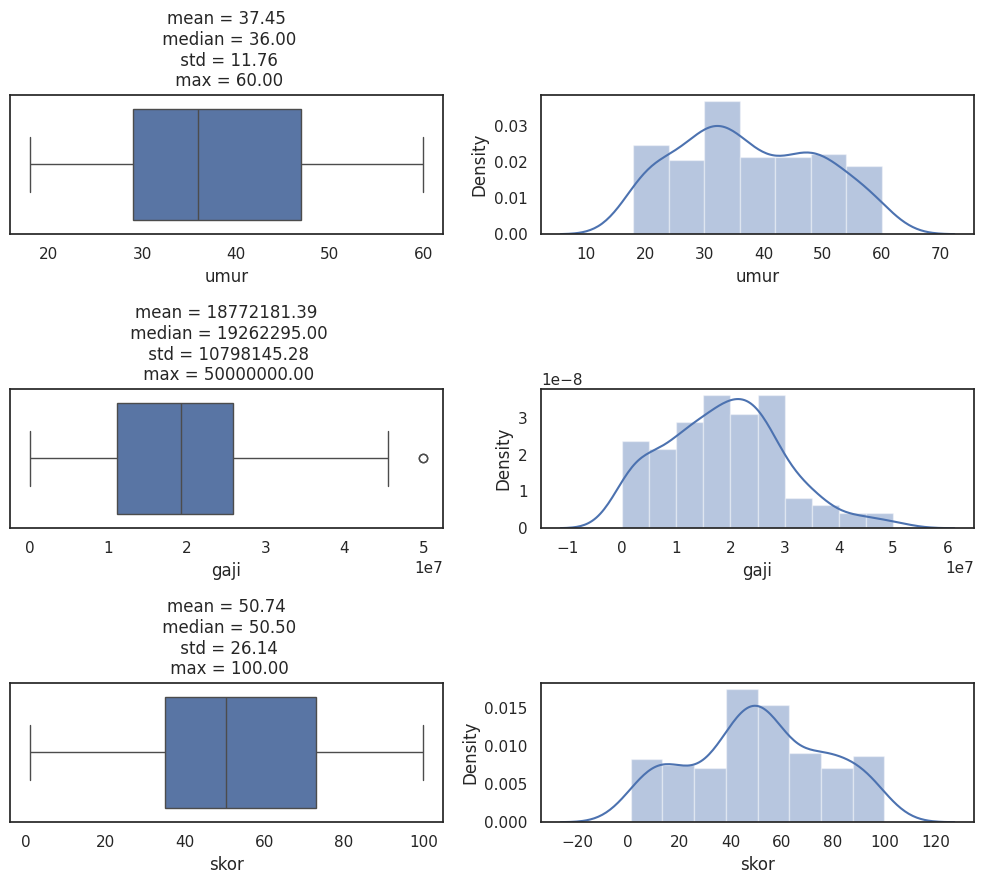

In [82]:
sns.set(style='white')
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        p1=sns.boxplot(df[kol], ax=axs[i][0], orient='h')
        p2=sns.distplot(df[kol], ax=axs[i][1])
        # Changed the format string to include a placeholder for the maximum value
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f\n max = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std(), df[kol].max()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
observasi_num(col_num)

## Eksplorasi Data Kategorik

In [83]:
col_cat = ['sex','menikah','kota', 'promo', 'hari', 'rasa']

In [84]:
df.shape

(194, 10)

In [85]:
df.dtypes

,0
id,int64
sex,category
umur,int64
gaji,int64
skor,int64
menikah,category
kota,category
promo,category
hari,category
rasa,category


<ipython-input-86-1dd6a12e8e57>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(column)[column].count().reset_index(name='count')
<ipython-input-86-1dd6a12e8e57>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x=column, y='count', data=grouped_df, palette='inferno', ax=axes[i], ci=None)
<ipython-input-86-1dd6a12e8e57>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=column, y='count', data=grouped_df, palette='inferno', ax=axes[i], ci=None)
<ipython-input-86-1dd6a12e8e57>:10: FutureWarning: The default of observed=False is deprecated and

<Figure size 640x480 with 0 Axes>

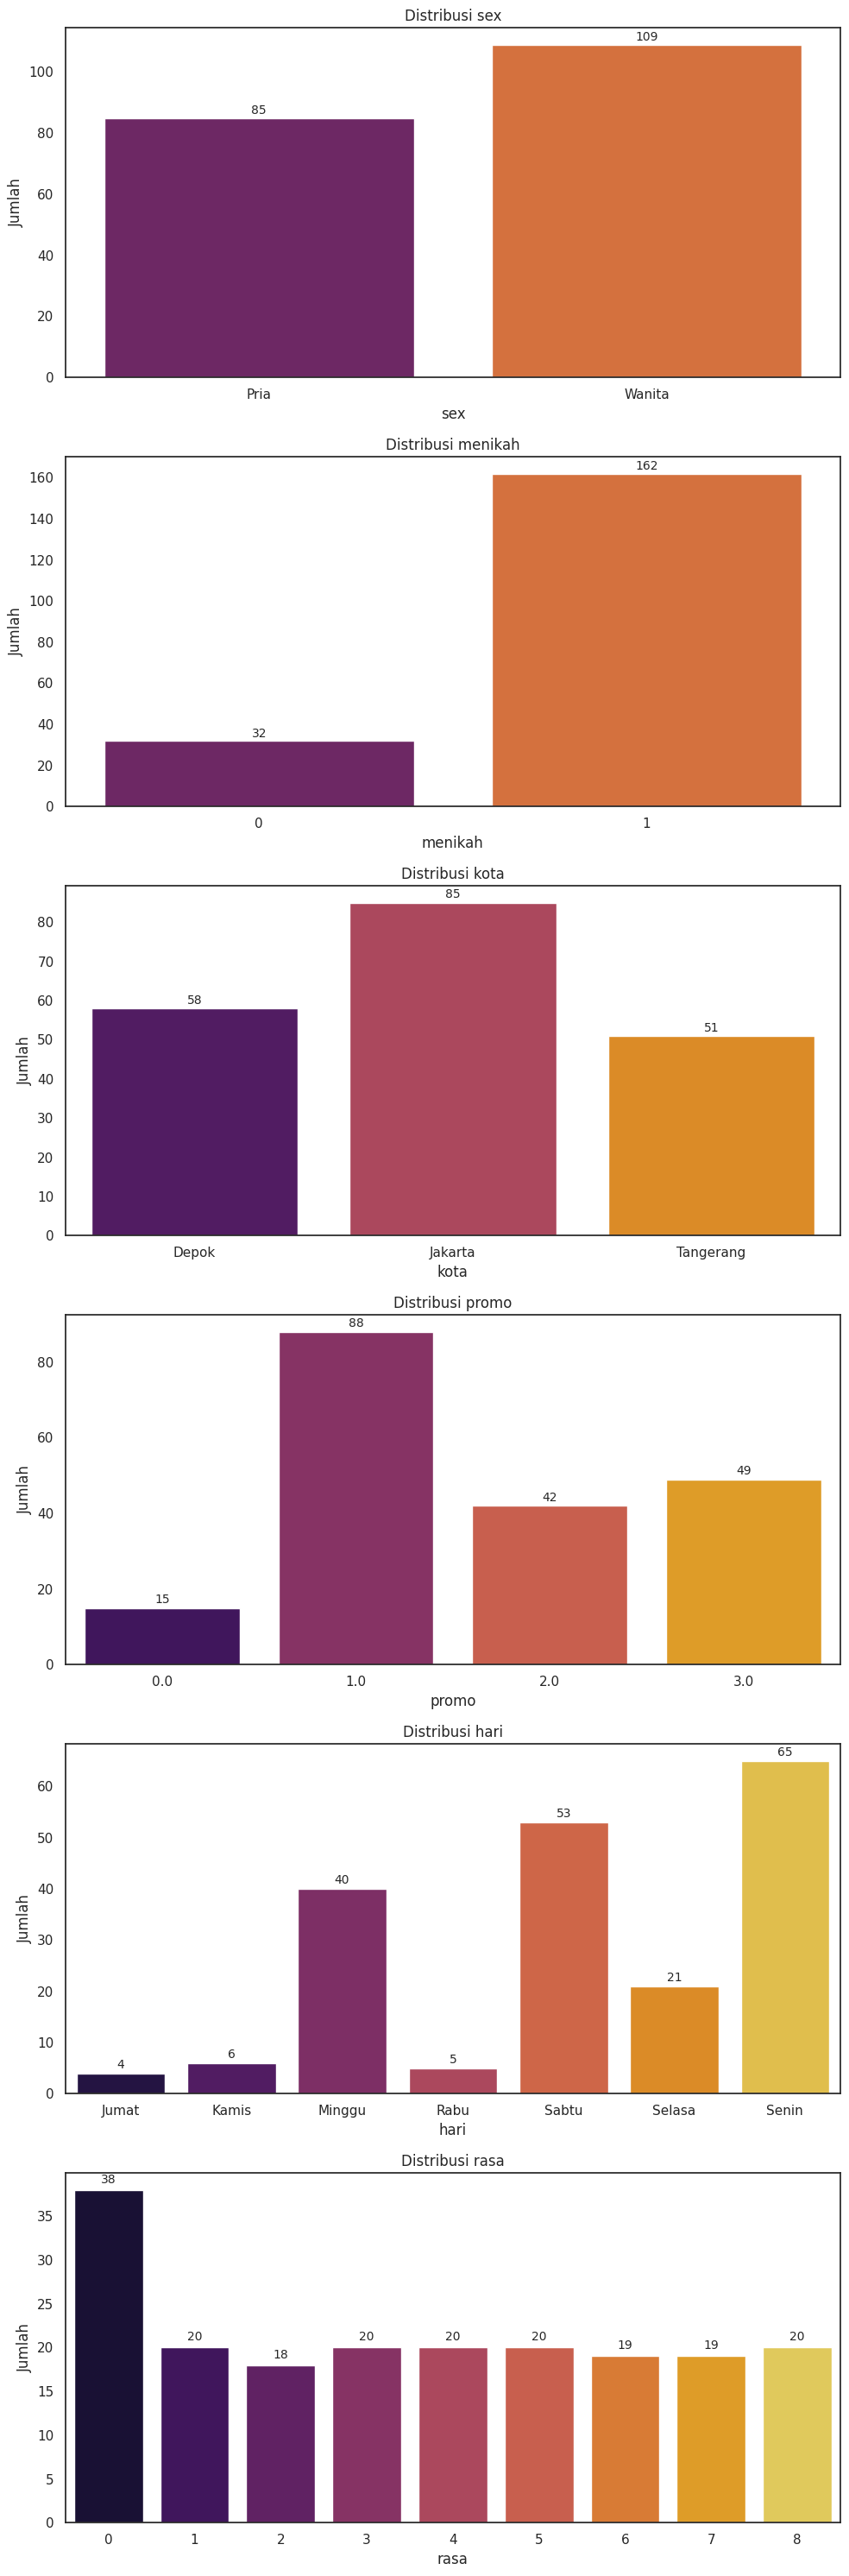

In [86]:
sns.set(style='white')
plt.clf()

# Membuat subplot untuk setiap kolom kategorik
fig, axes = plt.subplots(len(col_cat), 1, figsize=(10, len(col_cat) * 5))

# Iterasi setiap kolom kategorik
for i, column in enumerate(col_cat):
    # Menghitung jumlah data per kategori
    grouped_df = df.groupby(column)[column].count().reset_index(name='count')

    # Membuat bar chart
    bar_plot = sns.barplot(x=column, y='count', data=grouped_df, palette='inferno', ax=axes[i], ci=None)

    # Menambahkan jumlah di atas setiap bar
    for p in bar_plot.patches:
        bar_plot.text(
            p.get_x() + p.get_width() / 2,  # posisi x di tengah bar
            p.get_height() + 0.5,           # posisi y sedikit di atas bar
            int(p.get_height()),            # teks yang ditampilkan
            ha='center', va='bottom',       # horizontal dan vertical alignment
            fontsize=10                     # ukuran font
        )
    # Menambahkan judul dan label
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Jumlah')

# Menampilkan plot
plt.tight_layout()
plt.show()

<ipython-input-87-381086e21b40>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_.groupby(['rasa', 'sex'])['rasa'].count().reset_index(name='hitung')


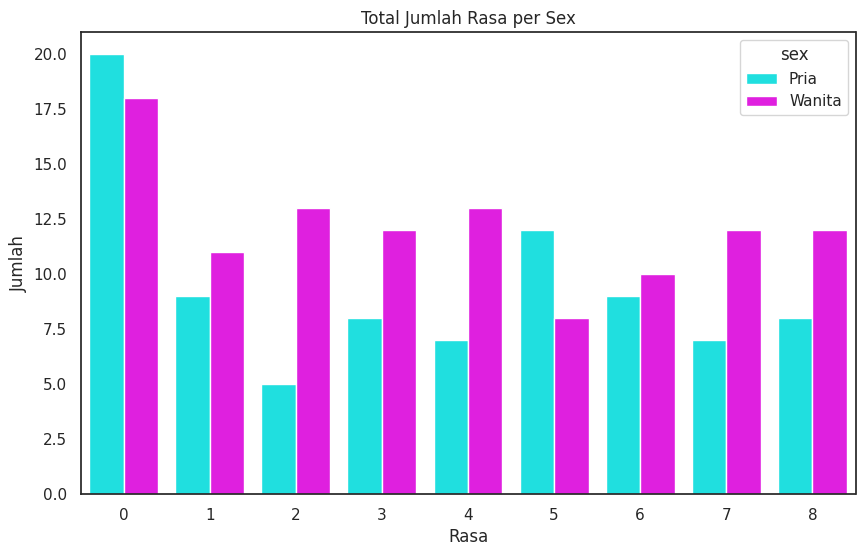

In [87]:
df_ = pd.DataFrame(df)

grouped_df = df_.groupby(['rasa', 'sex'])['rasa'].count().reset_index(name='hitung')

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x='rasa',y='hitung', hue='sex', data=grouped_df, palette=['cyan','magenta'])

# Menambahkan judul dan label
plt.title('Total Jumlah Rasa per Sex')
plt.xlabel('Rasa')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()

Text(0, 0.5, 'Frequency')

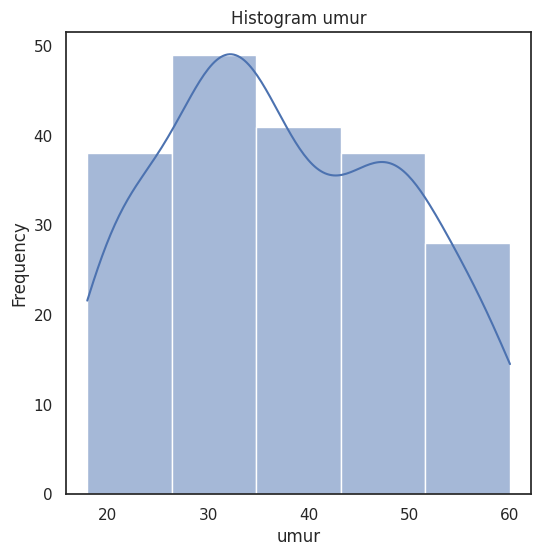

In [88]:
#grouped_df = df_.groupby('umur')['umur'].count().reset_index(name='hitung')

# Membuat histogram
plt.figure(figsize=(6, 6))
sns.histplot(df_['umur'], bins=5, kde=True)

# Menambahkan judul dan label
plt.title('Histogram umur')
plt.xlabel('umur')
plt.ylabel('Frequency')


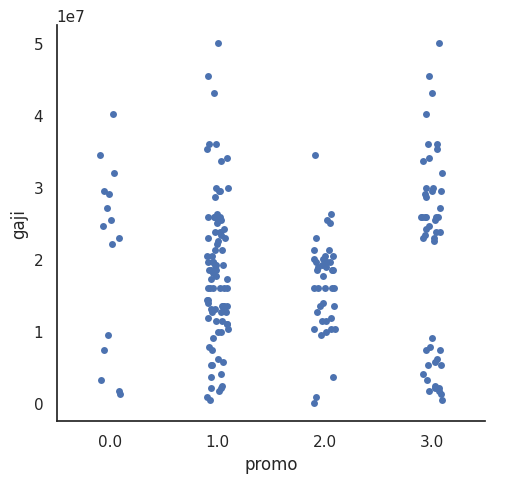

In [89]:
p = sns.catplot(x="promo", y="gaji", data=df)

In [90]:
df_.groupby('promo')['gaji'].describe()

<ipython-input-90-234a3b43d731>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_.groupby('promo')['gaji'].describe()


,count,mean,std,min,25%,50%,75%,max
promo,,,,,,,,
0.0,15.0,2.068306e+07,1.275474e+07,1229508.0,8401639.00,24590163.0,29303278.00,40163934.0
1.0,88.0,1.831688e+07,1.013790e+07,409836.0,11782786.00,17827868.0,24385245.25,50000000.0
2.0,42.0,1.640320e+07,6.603129e+06,0.0,12090163.25,18032786.0,19979508.00,34426229.0
3.0,49.0,2.103546e+07,1.364524e+07,409836.0,6147540.00,24590163.0,29508196.00,50000000.0


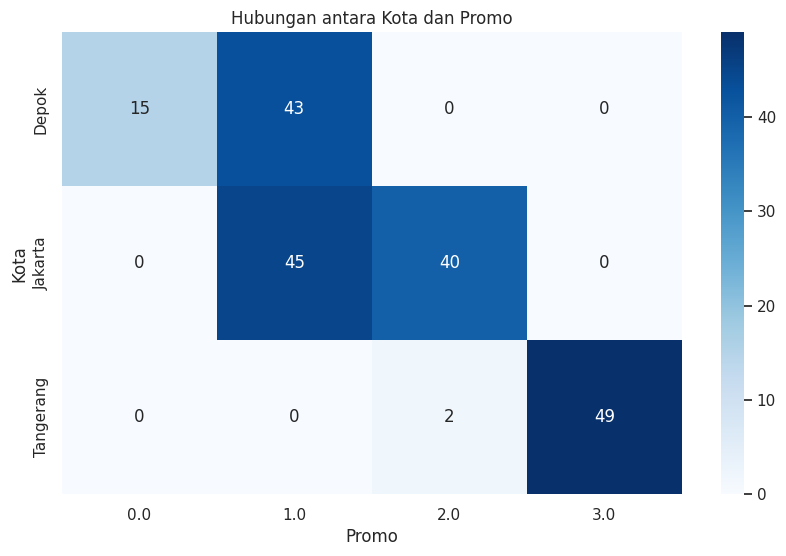

In [91]:
# Membuat crosstab untuk menghitung frekuensi setiap kombinasi kategori
crosstab = pd.crosstab(df['kota'], df['promo'])

# Mengubah crosstab menjadi DataFrame untuk visualisasi
# crosstab = crosstab.reset_index() # Remove this line to keep 'kota' as index

# Melt the dataframe to long-form for seaborn plotting
# crosstab_melted = pd.melt(crosstab, id_vars='kota', value_name='Count') # This is for barplot, not heatmap

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues') # crosstab is now a DataFrame with numerical values

# Menambahkan judul dan label
plt.title('Hubungan antara Kota dan Promo')
plt.xlabel('Promo')
plt.ylabel('Kota')

# Menampilkan plot
plt.show()

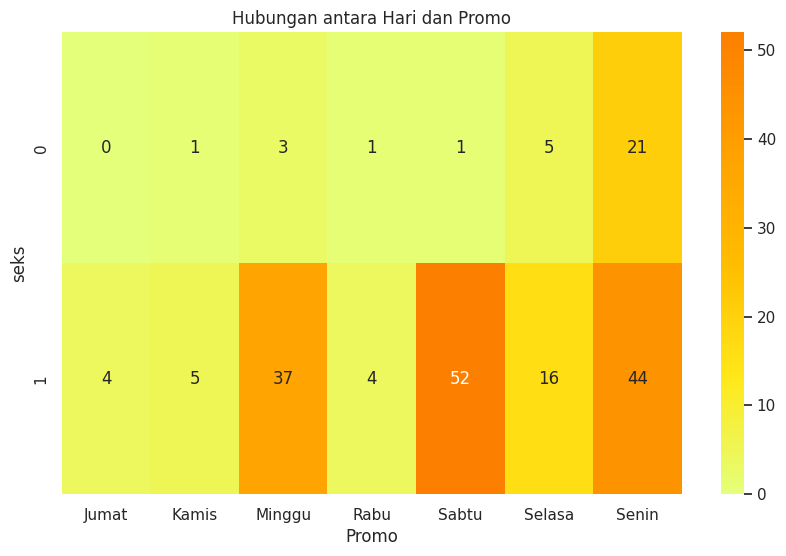

In [92]:
# Membuat crosstab untuk menghitung frekuensi setiap kombinasi kategori
crosstab = pd.crosstab(df['menikah'], df['hari'])

# Mengubah crosstab menjadi DataFrame untuk visualisasi
# crosstab = crosstab.reset_index() # Remove this line to keep 'kota' as index

# Melt the dataframe to long-form for seaborn plotting
# crosstab_melted = pd.melt(crosstab, id_vars='kota', value_name='Count') # This is for barplot, not heatmap

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Wistia') # crosstab is now a DataFrame with numerical values

# Menambahkan judul dan label
plt.title('Hubungan antara Hari dan Promo')
plt.xlabel('Promo')
plt.ylabel('seks')

# Menampilkan plot
plt.show()

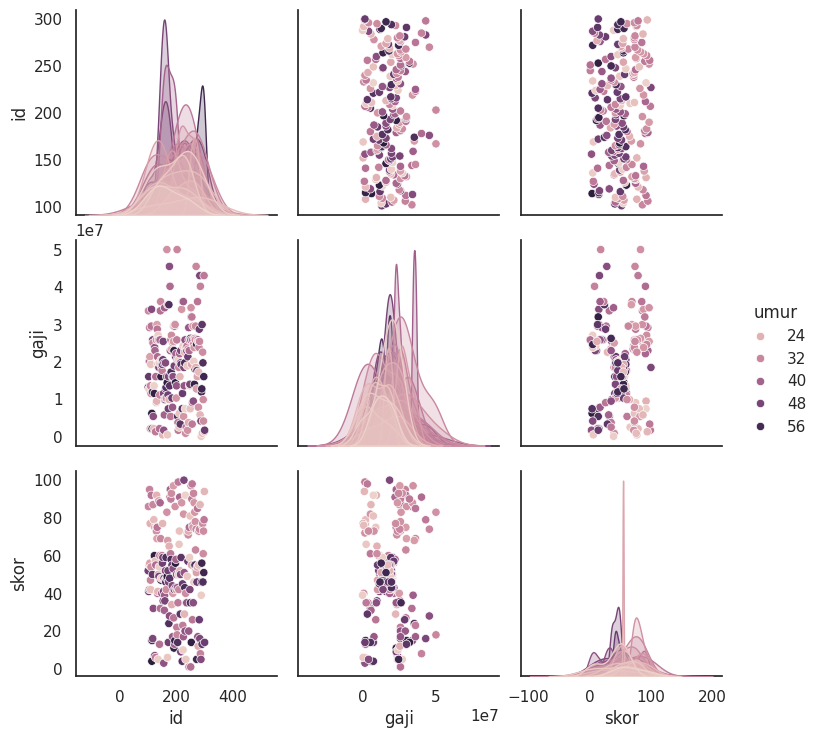

In [93]:
g = sns.pairplot(df, hue="umur")
g

# Standarisasi Kolom Numerik dengan Standar Scalar

In [94]:
#standarisasi

# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[col_num ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[col_num])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[col_num].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Setelah Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

        umur        gaji   skor
count  194.0       194.0  194.0
mean    37.4  18772181.4   50.7
std     11.8  10798145.3   26.1
min     18.0         0.0    1.0
25%     29.0  11065573.0   35.0
50%     36.0  19262295.0   50.5
75%     47.0  25819672.0   73.0
max     60.0  50000000.0  100.0

Hasil Standarisasi

       umur      gaji      skor
0  0.984806 -0.525281  0.048433
1 -0.464498  1.377344  1.352354
2  1.155312 -0.258914 -0.373424
3 -1.572789 -0.563334  0.163484
4  0.047021  0.121611 -0.335074

Statistik Setelah Standarisasi

        umur   gaji   skor
count  194.0  194.0  194.0
mean     0.0   -0.0   -0.0
std      1.0    1.0    1.0
min     -2.0   -2.0   -2.0
25%     -1.0   -1.0   -1.0
50%     -0.0    0.0   -0.0
75%      1.0    1.0    1.0
max      2.0    3.0    2.0


Setelah proses standardisasi, nilai mean dan deviasi standar setiap variabel berubah menjadi 0 dan 1. Ini menunjukkan bahwa data kita telah berada dalam skala yang seragam.

# Mengonversi Data Kategorik Dengan Label Encoder

In [95]:
#from sklearn.preprocessing import LabelEncoder

# Menyimpan objek LabelEncoder untuk setiap kolom
label_encoders = {}
df_encode = df[col_cat].copy()

for col in col_cat:
    le = LabelEncoder()
    df_encode[col] = le.fit_transform(df_encode[col])
    label_encoders[col] = le

# Menampilkan mapping untuk setiap kolom
for col, le in label_encoders.items():
    print(f"Makna untuk kolom '{col}':")
    for i, class_label in enumerate(le.classes_):
        print(f"  {i}: {class_label}")
    print("\n")

print(df_encode.head())

Makna untuk kolom 'sex':
  0: Pria
  1: Wanita


Makna untuk kolom 'menikah':
  0: 0
  1: 1


Makna untuk kolom 'kota':
  0: Depok
  1: Jakarta
  2: Tangerang


Makna untuk kolom 'promo':
  0: 0.0
  1: 1.0
  2: 2.0
  3: 3.0


Makna untuk kolom 'hari':
  0: Jumat
  1: Kamis
  2: Minggu
  3: Rabu
  4: Sabtu
  5: Selasa
  6: Senin


Makna untuk kolom 'rasa':
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8


   sex  menikah  kota  promo  hari  rasa
0    1        1     1      1     4     2
1    1        1     0      1     2     6
2    0        1     1      2     2     3
3    0        0     1      1     3     7
4    1        1     1      2     6     8


In [96]:
df_encode['hari'].value_counts()

,count
hari,
6,65
4,53
2,40
5,21
1,6
3,5
0,4


In [97]:
df['hari'].value_counts()

,count
hari,
Senin,65
Sabtu,53
Minggu,40
Selasa,21
Kamis,6
Rabu,5
Jumat,4


In [98]:
df_encode['sex'].value_counts()

,count
sex,
1,109
0,85


In [99]:
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
df_model.head()

,sex,menikah,kota,promo,hari,rasa,umur,gaji,skor
0,1,1,1,1,4,2,0.984806,-0.525281,0.048433
1,1,1,0,1,2,6,-0.464498,1.377344,1.352354
2,0,1,1,2,2,3,1.155312,-0.258914,-0.373424
3,0,0,1,1,3,7,-1.572789,-0.563334,0.163484
4,1,1,1,2,6,8,0.047021,0.121611,-0.335074


In [100]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      194 non-null    int64  
 1   menikah  194 non-null    int64  
 2   kota     194 non-null    int64  
 3   promo    194 non-null    int64  
 4   hari     194 non-null    int64  
 5   rasa     194 non-null    int64  
 6   umur     194 non-null    float64
 7   gaji     194 non-null    float64
 8   skor     194 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 15.2 KB


#Clustering
**Menentukan Jumlah Cluster yang Optimal**  

Pada algoritma *k-prototype*, salah satu parameter penting yang perlu ditentukan adalah jumlah cluster. Oleh karena itu, diperlukan pencarian jumlah cluster yang optimal. Salah satu metode yang bisa digunakan adalah dengan membuat *elbow plot*.  

*Elbow plot* dibuat dengan memvisualisasikan total jarak semua data ke pusat cluster masing-masing. Titik siku dari pola grafik tersebut dipilih sebagai jumlah cluster optimal.  

Untuk menghasilkan *elbow plot*, kamu perlu menjalankan algoritma *k-prototypes* dengan berbagai jumlah cluster, lalu menyimpan nilai `cost_`. Nilai tersebut kemudian divisualisasikan menggunakan *line plot* atau *point plot*.


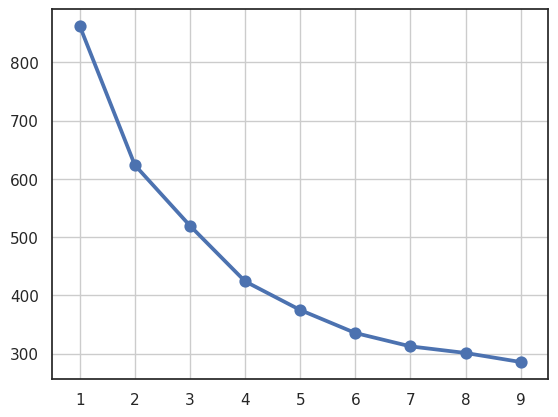

In [101]:
# Menyimpan cost untuk berbagai nilai k
cost = {}
K_range = range(1, 10)  # Nilai k dari 1 hingga 5

for k in K_range:
    kproto = KPrototypes(n_clusters=k, random_state=42)
    kproto.fit_predict(df_model, categorical = [1,2,3,4,5])
    cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

Berdasarkan output di atas, garis menunjukkan patahan yang membentuk elbow atau siku pada k = 2, 3, dan 4. Dengan metode ini, nilai k optimal dipilih saat k = 4. Untuk memastikan hasil ini, dilakukan pengujian tambahan sebagai pembanding. Hasil uji menunjukkan bahwa k = 4 adalah nilai k yang optimal.

### Membuat Model

In [102]:
# misal k = 4
# Inisialisasi dan fit K-Prototypes
kproto4 = KPrototypes(n_clusters=4, random_state=42)
kproto4 = kproto4.fit(df_model, categorical=[0,1,2,3,4,5])

#Save Model
pickle.dump(kproto4, open('cluster.pkl', 'wb'))

### Menggunakan Model

In [103]:
# Menentukan segmen tiap pelanggan
clusters4 = kproto4.predict(df_model, categorical = [0,1,2,3,4,5])
print('Segmen Pelanggan: {}\n'.format(clusters4))

# Menggabungkan data awal dan segmen pelanggan
df_final4 = df.copy()
df_final4['cluster'] = clusters4
print(df_final4.head(15))

Segmen Pelanggan: [2 3 2 1 2 3 1 1 1 1 1 3 0 2 2 2 0 3 2 1 1 2 0 3 1 2 2 1 3 1 3 3 2 1 0 1 3
 2 1 2 1 3 0 3 2 1 2 1 2 1 2 0 2 2 2 2 0 2 1 2 2 2 1 2 3 2 1 3 2 2 2 0 1 0
 2 3 3 1 3 2 3 0 2 2 2 1 2 3 0 0 2 0 0 3 2 2 2 1 2 0 0 2 2 1 1 1 1 1 1 3 1
 2 2 0 2 3 2 2 0 0 0 1 3 2 0 2 0 1 1 0 1 0 3 1 1 2 3 1 0 0 3 1 2 1 2 0 3 0
 1 3 1 2 3 3 2 3 1 3 2 3 2 3 3 1 3 1 0 2 1 3 0 0 1 1 3 0 3 0 1 0 2 1 2 2 0
 1 3 2 1 1 2 3 1 2]

     id     sex  umur      gaji  skor menikah       kota promo    hari rasa  \
0   101  Wanita    49  13114754    52       1    Jakarta   1.0   Sabtu    2   
1   102  Wanita    32  33606557    86       1      Depok   1.0  Minggu    6   
2   103    Pria    51  15983606    41       1    Jakarta   2.0  Minggu    3   
3   104    Pria    19  12704918    55       0    Jakarta   1.0    Rabu    7   
4   105  Wanita    38  20081967    42       1    Jakarta   2.0   Senin    8   
5   106  Wanita    33  29098360    95       1      Depok   0.0   Senin    0   
6   107    Pria    27  21311475  

### Visualisasi Hasil Clustering

<ipython-input-104-69b53dd58549>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'cluster',y = i, data = df_final4, palette='Set1')


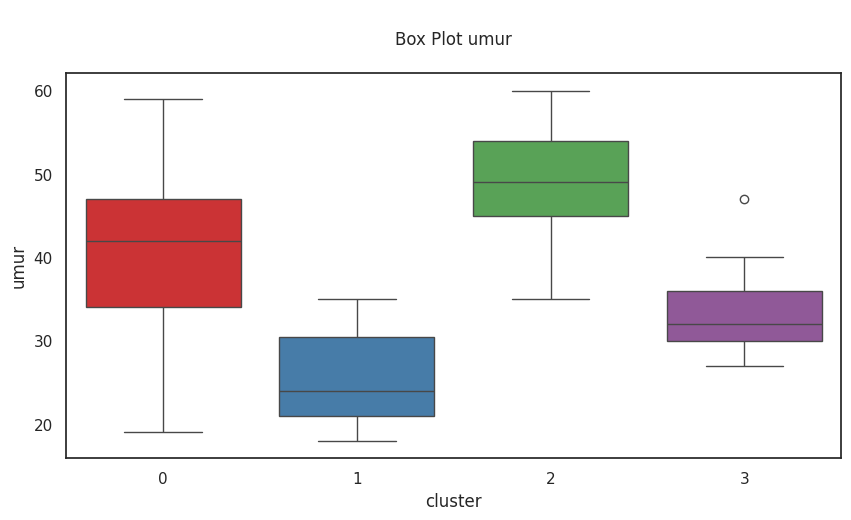

<ipython-input-104-69b53dd58549>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'cluster',y = i, data = df_final4, palette='Set1')


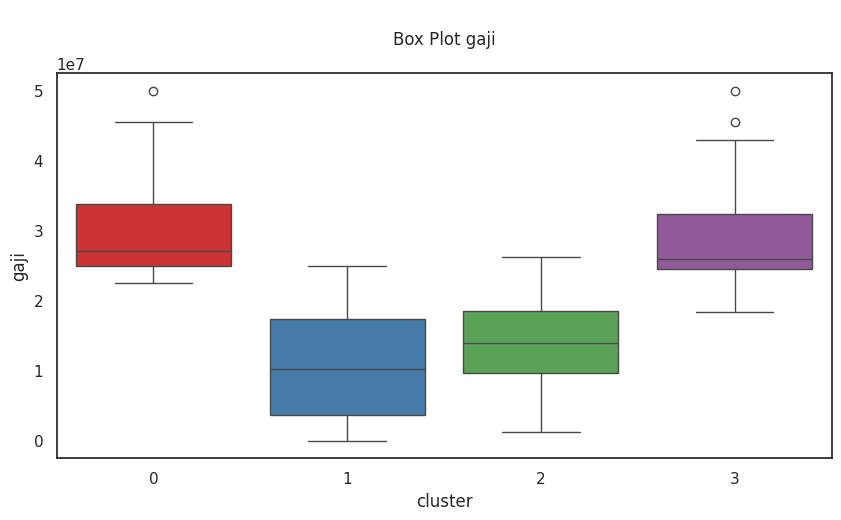

<ipython-input-104-69b53dd58549>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'cluster',y = i, data = df_final4, palette='Set1')


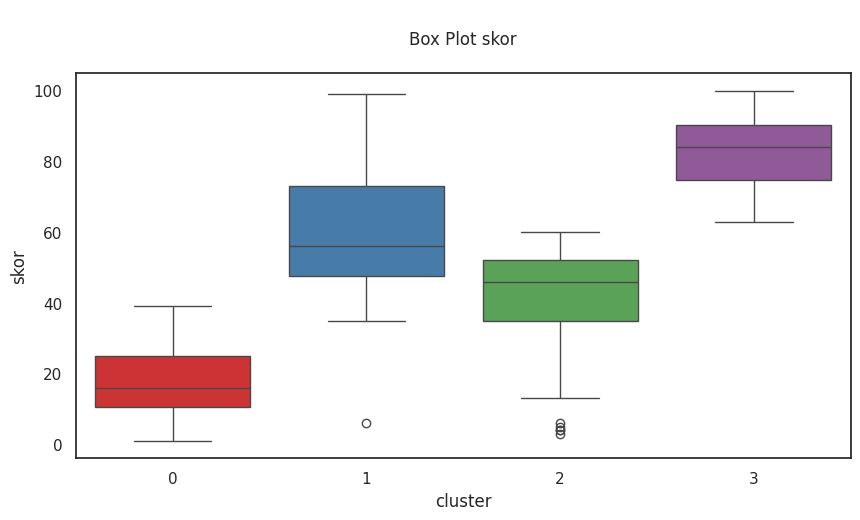

In [104]:
for i in col_num:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final4, palette='Set1')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()



Visualisasi Hasil Clustering - Count Plot

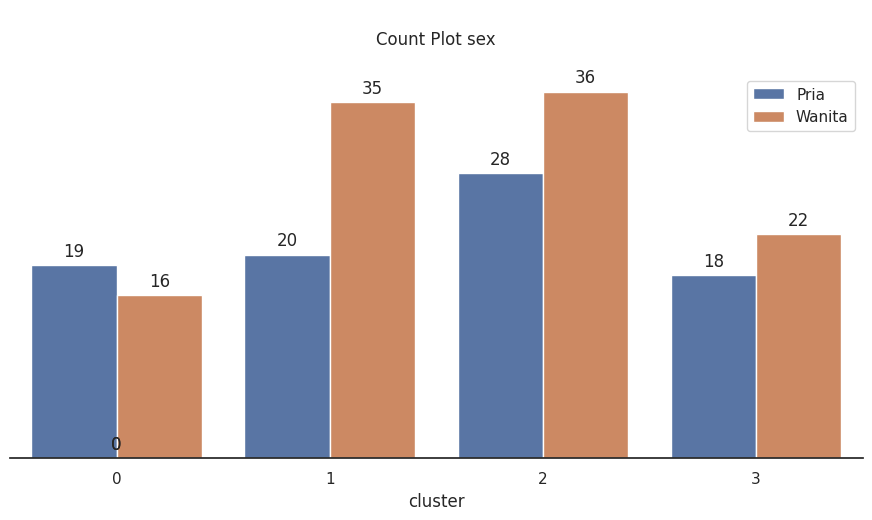

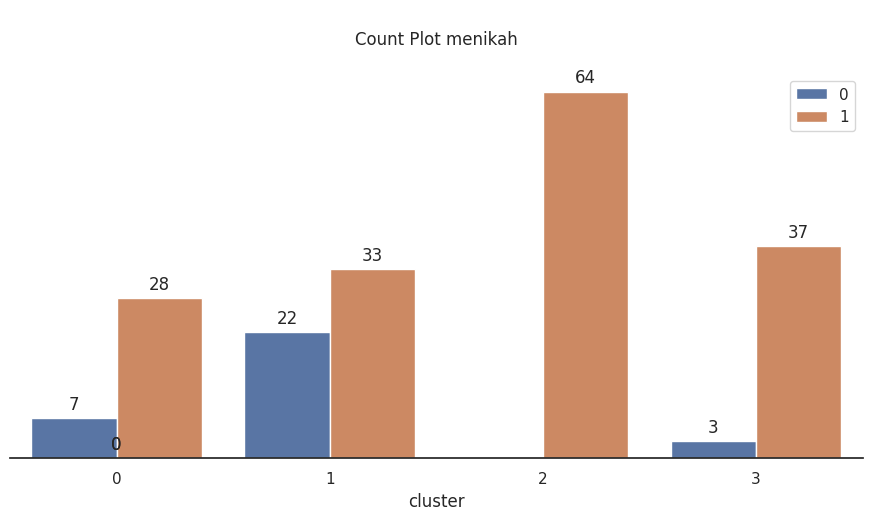

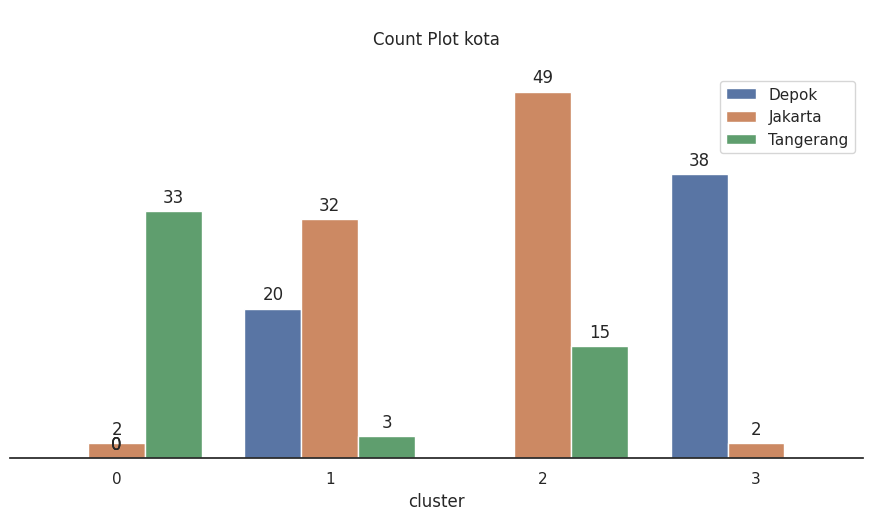

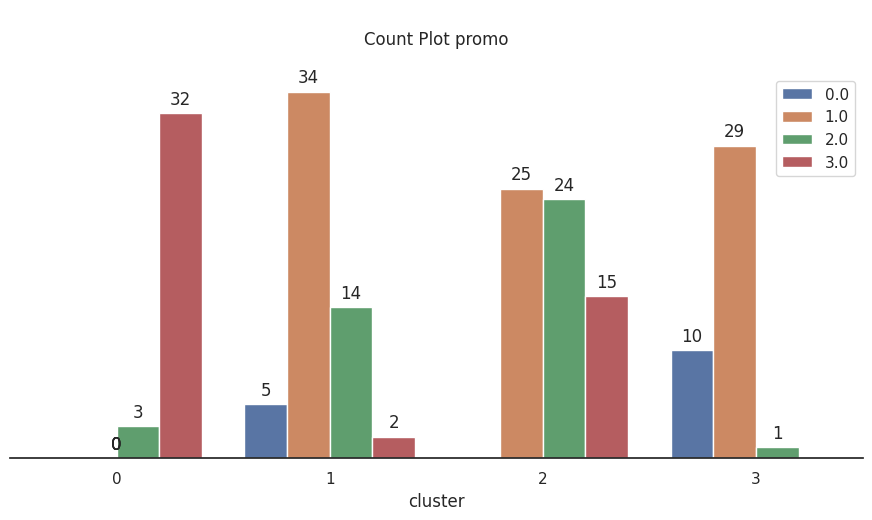

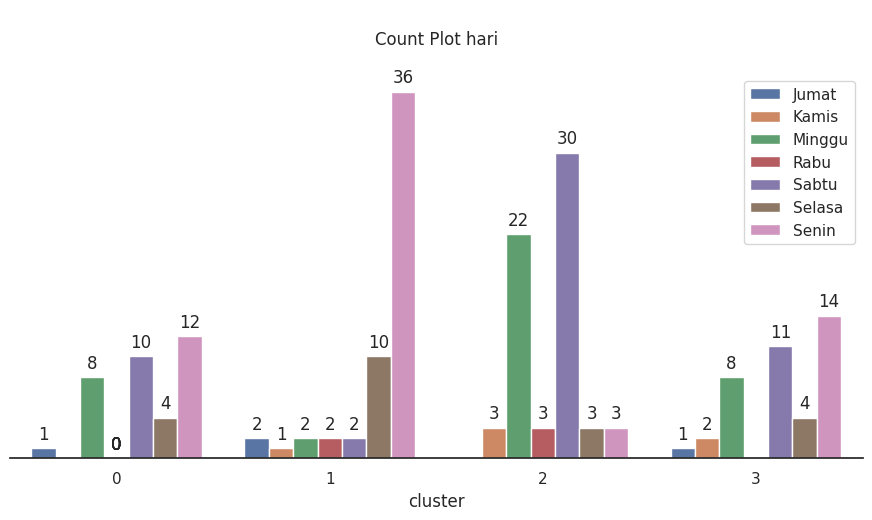

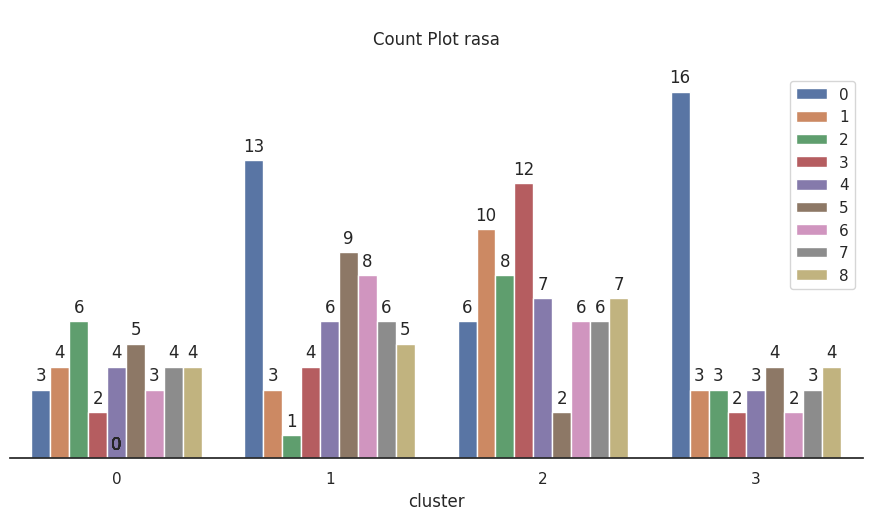

In [105]:
for i in col_cat:
    plt.figure(figsize=(11, 5))
    ax = sns.countplot(data=df_final4, x='cluster', hue=i)

    # Set judul
    plt.title(f'\nCount Plot {i}\n', fontsize=12)
    ax.legend(loc="upper right")

    # Menambahkan jumlah di atas setiap bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format angka
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi di tengah atas bar
            ha='center', va='center',
            xytext=(0, 10), textcoords='offset points'  # Offset vertikal
        )

    # Menghilangkan garis dan sumbu
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)

    # Tampilkan plot
    plt.show()


In [106]:
df_final4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       194 non-null    int64   
 1   sex      194 non-null    category
 2   umur     194 non-null    int64   
 3   gaji     194 non-null    int64   
 4   skor     194 non-null    int64   
 5   menikah  194 non-null    category
 6   kota     194 non-null    category
 7   promo    194 non-null    category
 8   hari     194 non-null    category
 9   rasa     194 non-null    category
 10  cluster  194 non-null    uint16  
dtypes: category(6), int64(4), uint16(1)
memory usage: 10.4 KB


Untuk memperjelas makna entri-entri kolom kategorik yang telah diubah menggunakan *label encoder*, kami melakukan proses *mapping* label. Proses ini mencatat pemetaan antara setiap nilai numerik hasil encoding dengan kategori aslinya, sehingga interpretasi data tetap jelas dan akurat.  

Selain itu, langkah ini membantu memudahkan analisis dan pelaporan dengan memastikan bahwa setiap angka yang digunakan dalam model dapat ditelusuri kembali ke makna kategoriknya.

In [107]:
# Menyimpan objek LabelEncoder untuk setiap kolom
label_encoders = {}
df_encode4 = df_final4[col_cat].copy()

for col in col_cat:
    le = LabelEncoder()
    df_encode4[col] = le.fit_transform(df_encode4[col])
    label_encoders[col] = le

# Menampilkan mapping untuk setiap kolom
for col, le in label_encoders.items():
    print(f"Makna untuk kolom '{col}':")
    for i, class_label in enumerate(le.classes_):
        print(f"  {i}: {class_label}")
    print("\n")

print(df_encode4.head())

Makna untuk kolom 'sex':
  0: Pria
  1: Wanita


Makna untuk kolom 'menikah':
  0: 0
  1: 1


Makna untuk kolom 'kota':
  0: Depok
  1: Jakarta
  2: Tangerang


Makna untuk kolom 'promo':
  0: 0.0
  1: 1.0
  2: 2.0
  3: 3.0


Makna untuk kolom 'hari':
  0: Jumat
  1: Kamis
  2: Minggu
  3: Rabu
  4: Sabtu
  5: Selasa
  6: Senin


Makna untuk kolom 'rasa':
  0: 0
  1: 1
  2: 2
  3: 3
  4: 4
  5: 5
  6: 6
  7: 7
  8: 8


   sex  menikah  kota  promo  hari  rasa
0    1        1     1      1     4     2
1    1        1     0      1     2     6
2    0        1     1      2     2     3
3    0        0     1      1     3     7
4    1        1     1      2     6     8


In [108]:
df_final4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       194 non-null    int64   
 1   sex      194 non-null    category
 2   umur     194 non-null    int64   
 3   gaji     194 non-null    int64   
 4   skor     194 non-null    int64   
 5   menikah  194 non-null    category
 6   kota     194 non-null    category
 7   promo    194 non-null    category
 8   hari     194 non-null    category
 9   rasa     194 non-null    category
 10  cluster  194 non-null    uint16  
dtypes: category(6), int64(4), uint16(1)
memory usage: 10.4 KB


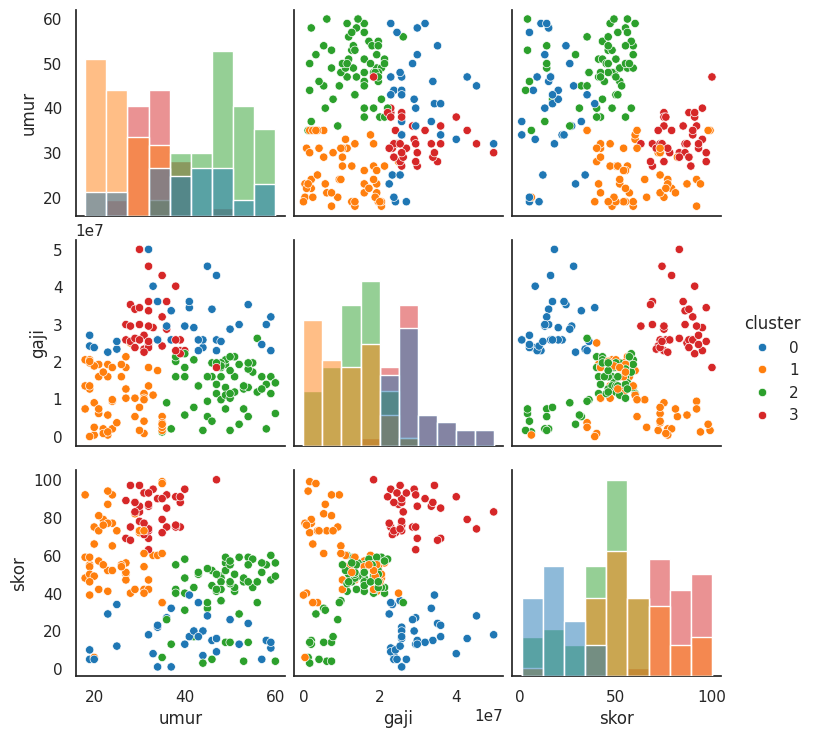

In [109]:
#df_final['cluster'] = C_kpp
gua_4 = sns.pairplot(df_final4[['umur', 'gaji','skor' ,'cluster']], \
                 hue="cluster", diag_kind="hist", palette="tab10")

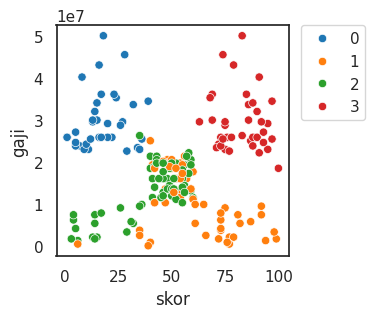

In [110]:
# Mengatur ukuran grafik
plt.figure(figsize=(3, 3))  # Atur sesuai ukuran yang diinginkan

# Membuat scatter plot
io = sns.scatterplot(x='skor', y='gaji', hue='cluster', data=df_final4, palette='tab10')

# Memindahkan legend ke pojok kanan atas
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Menampilkan grafik
plt.show()

**VARIABEL KATEGORIK**

cluster 0
- pria = 19, wanita = 16
- menikah = 7, tidak menikah = 28
- Depok = 0, Jakarta = 2, Tangerang = 33
- promo0 = 0, promo1 = 0, promo2 = 3, promo3 = 32
- Senin = 12
- coklat = 6

cluster 1
- pria = 20, wanita = 35
- menikah = 22, tidak menikah = 33
- Depok = 20, Jakarta = 32, Tangerang = 3
- promo0 = 5, promo1 = 34, promo2 = 14, promo3 = 2
- Senin = 36
- vanila = 13

cluster 2
- pria = 28, wanita = 36
- menikah = 0, tidak menikah = 64
- Depok = 0, Jakarta = 49, Tangerang = 15
- promo0 = 0, promo1 = 25, promo2 = 24, promo3 = 15
- Sabtu = 30
- blueberry = 13

cluster 3
- pria = 18, wanita = 22
- menikah = 3, tidak menikah = 37
- Depok = 38, Jakarta = 2, Tangerang = 0
- promo0 = 10, promo1 = 29, promo2 = 1, promo3 = 0
- Senin = 14
- vanila = 16

---


**VARIABEL NUMERIK**

cluster 0
- umur 20 s.d. 60, gaji 20 s.d. 50 juta, dengan skor kurang dari 40.

cluster 1
- umur 20 s.d. 40, gaji 0 s.d 20 juta, dengan skor antara 40 s.d. 90.

cluster 2
- umur 40 s.d. 60, gaji 0 s.d. 20 juta, dengan skor antara 0 s.d. 60.

cluster 3
- umur 25 s.d. 40, gaji 20 s.d. 50 juta, dengan skor antara 60 s.d. 100

# **Kesimpulan**
- Untuk `cluster 0` sebagian besar dari mereka adalah pria, baik pria maupun wanita berusia sekitar 20 sampai 60 dengan status ekonomi menengah ke atas berdasarkan pendapatan perbulan, mereka jarang berbelanja di MixITup. Kebanyakan dari mereka belum atau  tidak menikah, mendaftarkan loyalty programnya di Tanggerang. Mereka juga sering menggunakan promo saat membeli eskrim di hari Senin dengan rasa eskrim yang sering dibeli adalah coklat. `cluster 0` bisa disebut sebagai pelanggan level `bronze`.

- Untuk `cluster 1` sebagian besar dari mereka adalah wanita, baik pria maupun wanita berusia sekitar 20 sampai 40 dengan status ekonomi menengah ke bawah berdasarkan pendapatan perbulan, mereka agak sering berbelanja di MixITup. Sebagian besar dari mereka tidak menikah, mendaftarkan loyalty programnya di Jakarta. Mereka jarang menggunakan promo saat membeli eskrim di hari senin dengan rasa eskrim yang sering dibeli adalah vanila. `cluster 1` bisa disebut sebagai pelanggan level `gold`.

- Untuk `cluster 2` sebagian besar dari mereka adalah wanita, baik pria maupun wanita berusia sekitar 40 sampai 60 dengan status ekonomi menengah ke bawah berdasarkan pendapatan perbulan, mereka agak jarang berbelanja di MixITup. Mereka belum atau tidak menikah, mendaftarkan loyalty programnya di Jakarta. Mereka agak jarang menggunakan promo saat membeli eskrim di hari Sabtu dengan rasa eskrim yang sering dibeli adalah blueberry. `cluster 2` bisa disebut sebagai pelanggan level `silver`.

- Untuk `cluster 3` sebagian besar dari mereka adalah wanita, baik pria maupun wanita berusia sekitar 25 sampai 40 dengan status ekonomi menengah ke atas berdasarkan pendapatan perbulan, mereka sering berbelanja di MixITup. Kebanyakan dari mereka belum atau tidak menikah, mendaftarkan loyalty programnya di Depok. Mereka jarang menggunakan promo saat membeli eskrim di hari Senin dengan rasa eskrim yang sering dibeli adalah vanila. `cluster 3` bisa disebut sebagai pelanggan level `platinum`.

# **Saran dan Rekomendasi**

`Bronze`
- Memberikan promo pada mix 2 atau 3 rasa dengan salah satu rasanya adalah cokelat (rasa yang sering dibeli), sehingga bisa meningkatkan penjualan varian rasa yang lain (cross selling).
- Pada kota Tangerang bisa memperpanjang jam operasional pada hari Senin, Sabtu, dan Minggu karena banyak pembeli pada hari tersebut. Bisa juga menambahkan karyawan agar tidak kewalahan.
- Untuk kota Jakarta dan Depok disarankan untuk memperbanyak promo dan lebih sering mempromosikan kartu loyalty dengan menawarkan kelebihan khusus yang ada pada kartu tersebut.

---

`Silver`
- Memberikan promo pada mix 2 atau 3 rasa dengan salah satu rasanya adalah blueberry atau strawberry (dua rasa yang sering dibeli), sehingga bisa meningkatkan penjualan varian rasa yang lain (cross selling).
- Pada kota Jakarta, bisa memperpanjang jam operasional pada weekdend (hari Sabtu dan Minggu) karena banyak pembeli pada dua hari tersebut. Bisa juga menambahkan karyawan agar tidak kewalahan.
- Untuk meningkatkan penjualan di kota Depok, bisa dilakukan promosi di tempat tempat strategis untuk memasarkan tempat MixITup di cabang Depok, salah satu caranya yaitu mempromosikan kartu loyalty dengan menawarkan kelebihan khusus yang ada pada kartu tersebut.

---

`Gold`
- Memberikan promo pada mix 2 atau 3 rasa dengan salah satu rasanya adalah vanila (rasa yang sering dibeli), sehingga bisa meningkatkan penjualan varian rasa yang lain (cross selling).
- Pada kota Jakarta dan Depok bisa memperpanjang jam operasional pada hari Senin karena banyak pembeli pada hari tersebut. Bisa juga menambahkan karyawan agar tidak kewalahan.
- Untuk menghemat pengeluaran perusahaan selain hari Senin, dilakukan pengurangan jam operasional dan mengalihkan beberapa karyawan ke hari Senin.
- Untuk meningkatkan penjualan pada hari tertentu selain hari Senin di kota Tangerang, bisa membuat inovasi baru misalnya dengan memberikan menu spesial kepada 10 pelanggan pertama yang membeli rasa selain vanila.

---


`Platinum`
- Memberikan promo pada mix 2 atau 3 rasa dengan salah satu rasanya adalah vanila (rasa yang sering dibeli), sehingga bisa meningkatkan penjualan varian rasa yang lain (cross selling).
- Pada kota Depok, bisa memperpanjang jam operasional pada hari Senin dan Sabtu karena banyak pembeli pada hari tersebut. Bisa juga menambahkan karyawan agar tidak kewalahan.
- Untuk meningkatkan penjualan di kota Jakarta dan Tangerang, disarankan untuk memperbanyak promo dan lebih sering mempromosikan kartu loyalty dengan menawarkan kelebihan khusus yang ada pada kartu tersebut.
